In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', size=16)

In [ ]:
#1

# 1
Ошибка $f$ складывается из ошибки аппроксимации и ошибки вычисления:
$f = \dfrac{M_{3} (N \tau)^{2}}{6} + \dfrac{\Delta p}{N \tau} \\$
Найдем экстремум $f$:
$\dfrac{df}{dN} = 0$ $\newline$
$\dfrac{M_{3} \tau^{2}}{3} N - \dfrac{\Delta p}{N^{2} \tau} = 0$ $\newline$
$N = (\dfrac{3 \Delta p}{M_{3}})^{1/3} \dfrac{1}{\tau} = (\dfrac{3 \ 0.3 \ 1000^{3}}{3! 200 })^{1/3} \dfrac{1}{1} \approx 91 $

In [19]:
def diff182(t, p):
    return (p[182:] - p[:-182]) / (t[182:] - t[:-182])
def diff300(t, p):
    return (p[300:] - p[:-300]) / (t[300:] - t[:-300])

In [14]:
t = np.linspace(0, 1000, 1001)
p0 = 200
t0 = 1000

# Смоделируем измерения с погрешностью
p = p0 / (1 + t / t0) + 0.1 * np.random.randn(len(t))

# Истинное значение производной - для сравнения
pprime = -p0 / t0 / (1 + t / t0)**2;

In [15]:
def diff2(t, p):
    return (p[2:] - p[:-2]) / (t[2:] - t[:-2])

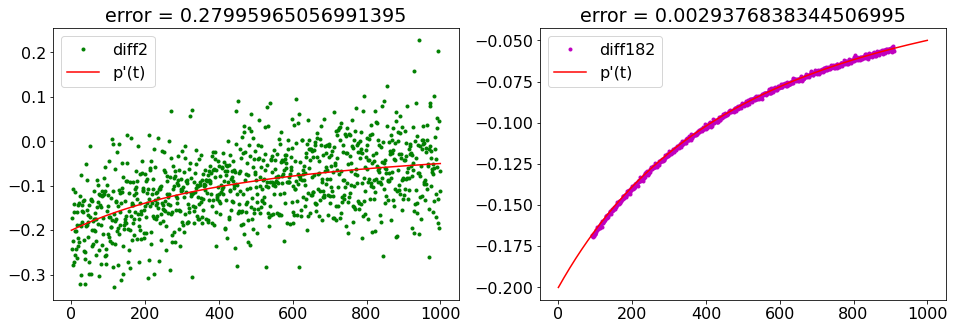

In [17]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t[1:-1], diff2(t, p), 'g.', label="diff2")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = ' + str(np.abs(diff2(t, p) - pprime[1:-1]).max()))
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.plot(t[91:-91], diff182(t, p), 'm.', label="diff182")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = ' + str(np.abs(diff182(t, p) - pprime[91:-91]).max()))
plt.legend(loc='best')

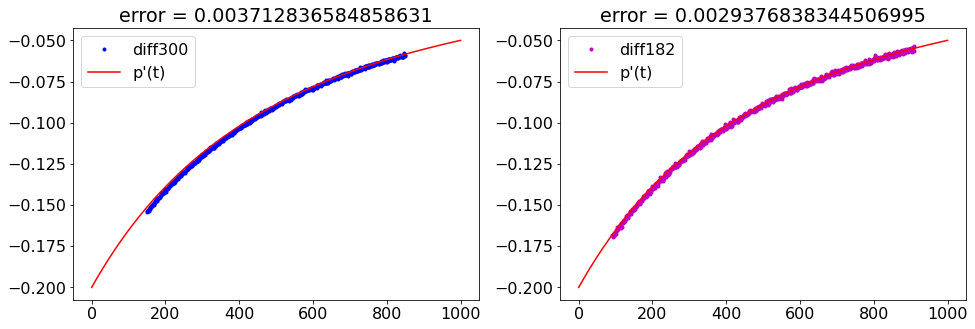

In [26]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 2)
plt.plot(t[91:-91], diff182(t, p), 'm.', label="diff182")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = ' + str(np.abs(diff182(t, p) - pprime[91:-91]).max()))
plt.legend(loc='best')
plt.subplot(1, 2, 1)
plt.plot(t[150:-150], diff300(t, p), 'b.', label="diff300")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = ' + str(np.abs(diff300(t, p) - pprime[150:-150]).max()))
plt.legend(loc='best')

Для примера, я также построил график для более удаленных точек (300), откуда мы видим, что $N = 91$ является оптимальным "расстоянием". Кроме того, теоретическая оценка в $0.005$ совпадает с полученной ~$0.003$ .

In [34]:
#2
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline

# 2
Из документации UnivariateSpline:
$\sum_{i=1}^n(w_{i} * (y_{i}-spl(x_{i}))^{2} \leq s \newline$
Однако, пользуясь курсом математической статистики:
$\sum_{i=1}^n(y_{i}-spl(x_{i}))^{2} - (\sum_{i=1}^n(y_{i}-spl(x_{i})))^{2} = n \sigma^{2} \Rightarrow \newline $
$\sum_{i=1}^n(y_{i}-spl(x_{i}))^{2} \geq n \sigma^{2} \newline$
При равенстве получим точку "излома":
$\newline s = n \sigma^{2}$

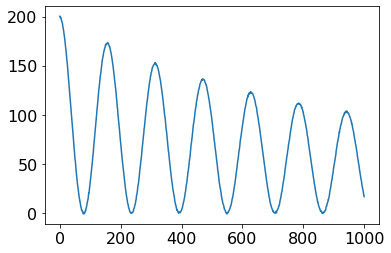

In [32]:
w0 = 0.04
u = p0 / (1 + t/t0) * (0.5 + 0.5 * np.cos(w0 * t)) + 0.5 * np.random.randn(len(t))
uprime = -p0*t0*(1 + np.cos(w0*t) + (t+t0)*w0*np.sin(w0*t))/(2*(t+t0)**2)

plt.plot(t, u)

In [40]:
Uint = InterpolatedUnivariateSpline(t, u, k=3)
Usmooth = UnivariateSpline(t, u, s=100)

Text(30, 1.0, 's = 215')

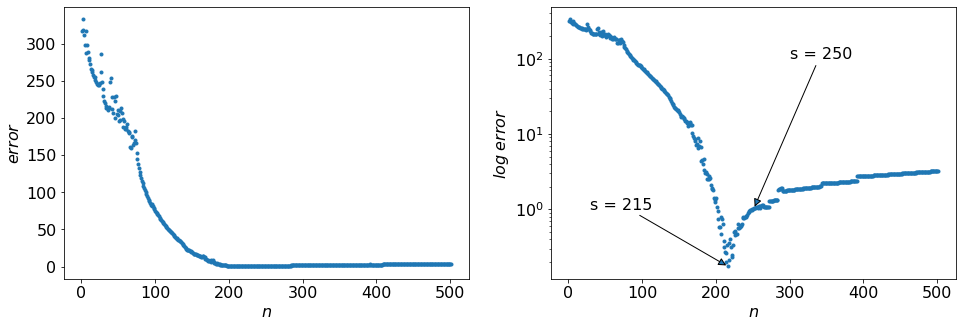

In [108]:
n = 500
errs = np.zeros(n)
s = np.linspace(1, n+1, n)

for i in range(0, n):
    Usmooth = UnivariateSpline(t, u, s=i)
    errs[i] = np.sum((Usmooth.derivative()(t) - uprime) ** 2)
    


plt.figure(figsize=(16, 5))
plt.subplot(121)
#plt.semilogy(s, errs, '.')
plt.scatter([0] + s, errs, marker='.')
plt.xlabel('$n$')
plt.ylabel('$error$')
           
plt.subplot(122)
plt.semilogy(s, errs, '.')
#plt.scatter([0] + s, errs, marker='.')
plt.xlabel('$n$')
plt.ylabel('$log \; error$')
plt.annotate("s = 250", xy=(s[250], errs[250]), xytext=(300, 1e2), 
             arrowprops={"arrowstyle":"-|>"})
plt.annotate("s = 215", xy=(s[215], errs[215]), xytext=(30, 1e0), 
             arrowprops={"arrowstyle":"-|>"})

In [110]:
Usmooth = UnivariateSpline(t, u, s=100)
print(errs[250])
print(min(errs))
print(list(errs).index(0.17456082313645066))

1.0273277239915184
0.17456082313645066
215


Как видно из логарифмического графика, мы почти "попали" нашей оценкой в результат